# H2O Tutorial

This is a [Jupyter](https://jupyter.org/) Notebook. When you execute code within the notebook, the results appear beneath the code. To execute a code chunk, place your cursor on the cell and press *Shift+Enter*. 

### Start H2O

Import the **h2o** Python module and `H2OAutoML` class and initialize a local H2O cluster.

In [1]:
import h2o
h2o.init()
#h2o.cluster().shutdown()

ModuleNotFoundError: No module named 'h2o'

### Load Data

In [2]:
# Use local data file or download from GitHub
import os
import pandas as pd
import h2o

url="https://www.dropbox.com/s/qv84y08fxm2mlm7/Telco-midterm.csv?dl=1"
df_pd = pd.read_csv(url)
df_pd = df_pd[~df_pd['Churn'].isna()]

In [3]:
df_pd.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,Female,0,0,0,3,1,0,No,Month-to-month,0,Mailed check,19.85,63.75,1.0
1,2,Female,0,0,0,68,1,1,Fiber optic,Two year,0,Credit card (automatic),110.25,7279.35,0.0
2,3,Male,0,1,1,25,1,0,Fiber optic,One year,1,Electronic check,90.40,2178.60,1.0
3,4,Male,0,1,0,24,1,1,DSL,One year,1,Electronic check,58.35,1346.90,0.0
4,5,Female,1,0,0,49,1,1,Fiber optic,Month-to-month,0,Credit card (automatic),101.55,5070.40,0.0


In [4]:
h2o = h2o.H2OFrame(df_pd)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


For classification, the response should be encoded as categorical (i.e., "factor" or "enum")

In [5]:
h2o.describe()

Rows:3083
Cols:15




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,int,enum,int,int,int,int,int,int,enum,enum,int,enum,real,real,int
mins,1.0,,0.0,0.0,0.0,1.0,0.0,0.0,,,0.0,,18.25,18.85,0.0
mean,1547.8887447291602,,0.15828738241972104,0.4657800843334415,0.29062601362309437,32.1083360363282,0.9004216672072657,0.41939669153421993,,,0.5951994810249757,,64.33258190074609,2234.150729808625,0.26921829386960755
maxs,3090.0,,1.0,1.0,1.0,72.0,1.0,1.0,,,1.0,,118.75,8672.45,1.0
sigma,890.9848820119581,,0.36506946765851983,0.49890854230126586,0.45412490162904917,24.55112807195238,0.2994855267577855,0.49354038822632834,,,0.49093302431902514,,30.16123465866412,2238.739034565378,0.4436255619595808
zeros,0,,2595,1647,2187,0,307,1790,,,1248,,0,0,2253
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,Female,0.0,0.0,0.0,3.0,1.0,0.0,No,Month-to-month,0.0,Mailed check,19.85,63.75,1.0
1,2.0,Female,0.0,0.0,0.0,68.0,1.0,1.0,Fiber optic,Two year,0.0,Credit card (automatic),110.25,7279.35,0.0
2,3.0,Male,0.0,1.0,1.0,25.0,1.0,0.0,Fiber optic,One year,1.0,Electronic check,90.4,2178.6,1.0


The response column, `"Churn"`, needs to be encoded as "factor" or "enum", and not as "int", we have to convert the column as follows:  `df['Target'] = df['Target'].asfactor()`

In [6]:
h2o['Churn'] = h2o['Churn'].asfactor()

In [7]:
target = "Churn"
predictors = h2o.columns
predictors.remove(target)
predictors.remove("customerID")

<AxesSubplot:>

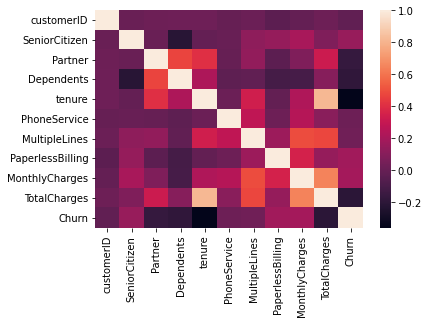

In [8]:
import seaborn as sns
sns.heatmap(df_pd.corr())

### Gradient Boosted Machines (GBMs) with cross-validation

In [9]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# Train a GBM model setting nfolds to 5
gbm = H2OGradientBoostingEstimator(nfolds = 5, seed = 1)
gbm.train(x=predictors, y=target, training_frame=h2o)

# AUC of cross-validated holdout predictions
gbm.auc(xval=True)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


0.8293287664639918

In [10]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1649612383597_3530


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,18923.0,5.0,5.0,5.0,14.0,32.0,25.46




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10958705027787119
RMSE: 0.3310393485340847
LogLoss: 0.34407248431937537
Mean Per-Class Error: 0.1745643024829009
AUC: 0.9087607420360537
AUCPR: 0.7853432305596293
Gini: 0.8175214840721075

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.366927257643553: 


,,0,1,Error,Rate
0,0,1901.0,352.0,0.1562,(352.0/2253.0)
1,1,171.0,659.0,0.206,(171.0/830.0)
2,Total,2072.0,1011.0,0.1696,(523.0/3083.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.366927,0.715915,204.0
1,max f2,0.201056,0.814076,273.0
2,max f0point5,0.512978,0.728127,140.0
3,max accuracy,0.512978,0.843659,140.0
4,max precision,0.934310,1.000000,0.0
5,max recall,0.028531,1.000000,377.0
6,max specificity,0.934310,1.000000,0.0
7,max absolute_mcc,0.366927,0.602549,204.0
8,max min_per_class_accuracy,0.332297,0.817577,217.0
9,max mean_per_class_accuracy,0.255586,0.825436,250.0



Gains/Lift Table: Avg response rate: 26.92 %, avg score: 26.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010055,0.872325,3.714458,3.714458,1.000000,0.900487,1.000000,0.900487,0.037349,0.037349,271.445783,271.445783,0.037349
1,2,0.020110,0.842746,3.594637,3.654547,0.967742,0.856622,0.983871,0.878555,0.036145,0.073494,259.463661,265.454722,0.073050
2,3,0.030165,0.822020,3.474815,3.594637,0.935484,0.832735,0.967742,0.863281,0.034940,0.108434,247.481539,259.463661,0.107102
3,4,0.040221,0.795325,3.235173,3.504771,0.870968,0.807613,0.943548,0.849364,0.032530,0.140964,223.517295,250.477070,0.137857
4,5,0.050276,0.772715,3.115352,3.426887,0.838710,0.780696,0.922581,0.835630,0.031325,0.172289,211.535173,242.688690,0.166963
5,6,0.100227,0.672897,3.159701,3.293726,0.850649,0.720999,0.886731,0.778500,0.157831,0.330120,215.970114,229.372636,0.314586
6,7,0.150178,0.593996,2.629064,3.072651,0.707792,0.631159,0.827214,0.729493,0.131325,0.461446,162.906431,207.265086,0.425938
7,8,0.200130,0.526824,2.315506,2.883671,0.623377,0.558940,0.776337,0.686923,0.115663,0.577108,131.550618,188.367148,0.515857
8,9,0.300032,0.394653,1.736630,2.501738,0.467532,0.456242,0.673514,0.610113,0.173494,0.750602,73.662964,150.173754,0.616559
9,10,0.399935,0.276946,1.205993,2.178064,0.324675,0.336857,0.586375,0.541854,0.120482,0.871084,20.599280,117.806408,0.644719




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.14390846807523988
RMSE: 0.3793526961486367
LogLoss: 0.43831288539385466
Mean Per-Class Error: 0.2361028668602505
AUC: 0.8293287664639918
AUCPR: 0.6220272289154712
Gini: 0.6586575329279836

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20607928891090804: 


,,0,1,Error,Rate
0,0,1542.0,711.0,0.3156,(711.0/2253.0)
1,1,130.0,700.0,0.1566,(130.0/830.0)
2,Total,1672.0,1411.0,0.2728,(841.0/3083.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.206079,0.624721,271.0
1,max f2,0.146094,0.742724,300.0
2,max f0point5,0.561755,0.601075,125.0
3,max accuracy,0.561755,0.788842,125.0
4,max precision,0.947001,1.000000,0.0
5,max recall,0.008625,1.000000,399.0
6,max specificity,0.947001,1.000000,0.0
7,max absolute_mcc,0.206079,0.469897,271.0
8,max min_per_class_accuracy,0.284047,0.751886,237.0
9,max mean_per_class_accuracy,0.206079,0.763897,271.0



Gains/Lift Table: Avg response rate: 26.92 %, avg score: 26.80 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010055,0.880930,2.995531,2.995531,0.806452,0.909721,0.806452,0.909721,0.030120,0.030120,199.553051,199.553051,0.027457
1,2,0.020435,0.861890,3.134074,3.065902,0.843750,0.870460,0.825397,0.889779,0.032530,0.062651,213.407380,206.590170,0.057768
2,3,0.030165,0.834643,2.971566,3.035471,0.800000,0.848389,0.817204,0.876427,0.028916,0.091566,197.156627,203.547092,0.084021
3,4,0.040221,0.804527,2.516246,2.905665,0.677419,0.821187,0.782258,0.862617,0.025301,0.116867,151.624563,190.566459,0.104883
4,5,0.050276,0.772453,2.636067,2.851745,0.709677,0.786991,0.767742,0.847492,0.026506,0.143373,163.606685,185.174504,0.127395
5,6,0.100227,0.669659,2.387866,2.620556,0.642857,0.718771,0.705502,0.783340,0.119277,0.262651,138.786575,162.055601,0.222260
6,7,0.150178,0.587331,2.411986,2.551183,0.649351,0.627262,0.686825,0.731426,0.120482,0.383133,141.198560,155.118270,0.318774
7,8,0.200130,0.527566,1.784869,2.359915,0.480519,0.558333,0.635332,0.688223,0.089157,0.472289,78.486935,135.991486,0.372422
8,9,0.300032,0.389767,1.603970,2.108206,0.431818,0.458795,0.567568,0.611830,0.160241,0.632530,60.397043,110.820580,0.454989
9,10,0.399935,0.264878,1.411012,1.934049,0.379870,0.326828,0.520681,0.540637,0.140964,0.773494,41.101158,93.404860,0.511177




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.759507,0.032717,0.762903,0.777603,0.798061,0.747557,0.711409
1,auc,0.829343,0.020026,0.821381,0.845371,0.845825,0.835921,0.798215
2,err,0.240493,0.032717,0.237097,0.222397,0.201939,0.252443,0.288591
3,err_count,148.000000,17.349352,147.000000,141.000000,125.000000,155.000000,172.000000
4,f0point5,0.575295,0.045337,0.557604,0.601436,0.627907,0.580769,0.508757
5,f1,0.631633,0.029741,0.622108,0.655257,0.633431,0.660832,0.586538
6,f2,0.704218,0.046108,0.703488,0.719656,0.639053,0.766497,0.692395
7,lift_top_group,3.248930,0.433418,3.384895,3.123153,3.684524,3.488636,2.563441
8,logloss,0.438640,0.021206,0.434799,0.425985,0.418906,0.439752,0.473756
9,max_per_class_error,0.287753,0.053159,0.239741,0.229885,0.357143,0.296804,0.315193



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-04-13 10:18:49,0.524 sec,0.0,0.443554,0.582480,0.500000,0.269218,1.000000,0.730782
1,,2022-04-13 10:18:49,0.528 sec,1.0,0.429364,0.551606,0.853653,0.665826,3.160547,0.231268
2,,2022-04-13 10:18:49,0.531 sec,2.0,0.417693,0.527428,0.855017,0.666728,3.160547,0.230944
3,,2022-04-13 10:18:49,0.533 sec,3.0,0.408080,0.507965,0.856283,0.667712,3.160547,0.215375
4,,2022-04-13 10:18:49,0.536 sec,4.0,0.399933,0.491609,0.860444,0.676883,3.160547,0.208239
5,,2022-04-13 10:18:49,0.539 sec,5.0,0.393110,0.477809,0.863484,0.685517,3.343012,0.216996
6,,2022-04-13 10:18:49,0.542 sec,6.0,0.387242,0.465888,0.864729,0.687039,3.343012,0.218943
7,,2022-04-13 10:18:49,0.545 sec,7.0,0.382298,0.455621,0.867416,0.690840,3.343012,0.211807
8,,2022-04-13 10:18:49,0.548 sec,8.0,0.378111,0.446778,0.868950,0.694057,3.439313,0.207266
9,,2022-04-13 10:18:49,0.551 sec,9.0,0.374360,0.438741,0.870031,0.696538,3.439313,0.202725



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract,524.826965,1.000000,0.376188
1,tenure,204.692337,0.390019,0.146720
2,TotalCharges,175.631607,0.334647,0.125890
3,MonthlyCharges,172.523102,0.328724,0.123662
4,InternetService,154.382141,0.294158,0.110659
5,PaymentMethod,60.356342,0.115002,0.043262
6,MultipleLines,25.250862,0.048113,0.018099
7,gender,16.727461,0.031872,0.011990
8,SeniorCitizen,16.478788,0.031399,0.011812
9,PaperlessBilling,15.127492,0.028824,0.010843


### XgBoost

#### Split the dataset into a train and valid set

In [140]:
from h2o.estimators import H2OXGBoostEstimator

#Split the dataset into a train and valid set:
train, valid = h2o.split_frame(ratios=[.7], seed=1)

# Build and train the model:
xgb = H2OXGBoostEstimator(booster='dart',
                                  normalize_type="tree",
                                  seed=1234)
xgb.train(x=predictors,
                  y=target,
                  training_frame=train,
                  validation_frame=valid)

# Eval performance:
perf = xgb.model_performance()

# Generate predictions on a test set (if necessary):
pred = xgb.predict(valid)

# Extract feature interactions:
feature_interactions = xgb.feature_interaction()

xgboost Model Build progress: |███████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%


In [141]:
xgb

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_model_python_1620086262320_287


Model Summary: 


,,number_of_trees
0,,50.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.05644012619348459
RMSE: 0.23757130759728665
LogLoss: 0.20557772678783912
Mean Per-Class Error: 0.05679726618784464
AUC: 0.985353789079105
AUCPR: 0.9597516442063009
Gini: 0.97070757815821

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.455268919467926: 


,,0,1,Error,Rate
0,0,1543.0,60.0,0.0374,(60.0/1603.0)
1,1,53.0,512.0,0.0938,(53.0/565.0)
2,Total,1596.0,572.0,0.0521,(113.0/2168.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.455269,0.900616,176.0
1,max f2,0.310288,0.928235,222.0
2,max f0point5,0.494811,0.905865,162.0
3,max accuracy,0.458088,0.947878,175.0
4,max precision,0.991896,1.000000,0.0
5,max recall,0.118466,1.000000,307.0
6,max specificity,0.991896,1.000000,0.0
7,max absolute_mcc,0.455269,0.865324,176.0
8,max min_per_class_accuracy,0.404994,0.939823,194.0
9,max mean_per_class_accuracy,0.374369,0.943203,203.0



Gains/Lift Table: Avg response rate: 26.06 %, avg score: 26.13 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010148,0.945023,3.837168,3.837168,1.000000,0.963820,1.000000,0.963820,0.038938,0.038938,283.716814,283.716814,0.038938
1,2,0.020295,0.919341,3.837168,3.837168,1.000000,0.933279,1.000000,0.948550,0.038938,0.077876,283.716814,283.716814,0.077876
2,3,0.030443,0.900984,3.837168,3.837168,1.000000,0.908997,1.000000,0.935366,0.038938,0.116814,283.716814,283.716814,0.116814
3,4,0.040129,0.880011,3.837168,3.837168,1.000000,0.889923,1.000000,0.924397,0.037168,0.153982,283.716814,283.716814,0.153982
4,5,0.050277,0.862543,3.837168,3.837168,1.000000,0.872239,1.000000,0.913869,0.038938,0.192920,283.716814,283.716814,0.192920
5,6,0.100092,0.766200,3.837168,3.837168,1.000000,0.809167,1.000000,0.861760,0.191150,0.384071,283.716814,283.716814,0.384071
6,7,0.150369,0.675388,3.555541,3.743005,0.926606,0.723842,0.975460,0.815646,0.178761,0.562832,255.554112,274.300451,0.557841
7,8,0.200185,0.578670,3.375287,3.651499,0.879630,0.631633,0.951613,0.769855,0.168142,0.730973,237.528679,265.149872,0.717873
8,9,0.300277,0.378462,2.228033,3.177010,0.580645,0.480719,0.827957,0.673476,0.223009,0.953982,122.803311,217.701018,0.884113
9,10,0.399908,0.200336,0.373058,2.478448,0.097222,0.276224,0.645905,0.574507,0.037168,0.991150,-62.694199,147.844770,0.799635




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.15609862753413734
RMSE: 0.39509318841779256
LogLoss: 0.4762095630771703
Mean Per-Class Error: 0.24029027576197381
AUC: 0.8247169811320754
AUCPR: 0.6173231347311249
Gini: 0.6494339622641507

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19343821704387665: 


,,0,1,Error,Rate
0,0,448.0,202.0,0.3108,(202.0/650.0)
1,1,45.0,220.0,0.1698,(45.0/265.0)
2,Total,493.0,422.0,0.2699,(247.0/915.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.193438,0.640466,266.0
1,max f2,0.099025,0.765147,319.0
2,max f0point5,0.491429,0.600351,143.0
3,max accuracy,0.491429,0.770492,143.0
4,max precision,0.893035,0.838710,18.0
5,max recall,0.004906,1.000000,391.0
6,max specificity,0.990187,0.998462,0.0
7,max absolute_mcc,0.193438,0.472627,266.0
8,max min_per_class_accuracy,0.259045,0.746154,233.0
9,max mean_per_class_accuracy,0.193438,0.759710,266.0



Gains/Lift Table: Avg response rate: 28.96 %, avg score: 27.34 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010929,0.951094,2.071698,2.071698,0.600000,0.972751,0.600000,0.972751,0.022642,0.022642,107.169811,107.169811,0.016488
1,2,0.020765,0.941938,3.069182,2.544191,0.888889,0.944100,0.736842,0.959179,0.030189,0.052830,206.918239,154.419067,0.045138
2,3,0.030601,0.901015,3.452830,2.836253,1.000000,0.919280,0.821429,0.946355,0.033962,0.086792,245.283019,183.625337,0.079100
3,4,0.040437,0.877366,1.918239,2.612953,0.555556,0.887268,0.756757,0.931982,0.018868,0.105660,91.823899,161.295258,0.091814
4,5,0.050273,0.851030,3.069182,2.702215,0.888889,0.865366,0.782609,0.918949,0.030189,0.135849,206.918239,170.221493,0.120464
5,6,0.100546,0.738766,2.627153,2.664684,0.760870,0.788213,0.771739,0.853581,0.132075,0.267925,162.715340,166.468417,0.235617
6,7,0.150820,0.661932,1.801477,2.376948,0.521739,0.699505,0.688406,0.802222,0.090566,0.358491,80.147662,137.694832,0.292337
7,8,0.200000,0.563512,1.688050,2.207547,0.488889,0.610923,0.639344,0.755182,0.083019,0.441509,68.805031,120.754717,0.339971
8,9,0.300546,0.380034,1.651354,2.021475,0.478261,0.473436,0.585455,0.660925,0.166038,0.607547,65.135357,102.147513,0.432163
9,10,0.400000,0.255785,1.403898,1.867925,0.406593,0.319728,0.540984,0.576092,0.139623,0.747170,40.389799,86.792453,0.488708




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2021-05-03 20:06:23,0.072 sec,0.0,0.500000,0.693147,0.500000,0.260609,1.000000,0.739391,0.500000,0.693147,0.500000,0.289617,1.000000,0.710383
1,,2021-05-03 20:06:23,0.244 sec,1.0,0.434559,0.568533,0.861107,0.693679,3.304228,0.211255,0.443730,0.584841,0.829356,0.634002,2.895922,0.228415
2,,2021-05-03 20:06:24,0.331 sec,2.0,0.396749,0.498111,0.877069,0.717037,3.426043,0.194188,0.414421,0.527925,0.835562,0.640859,2.857515,0.252459
3,,2021-05-03 20:06:24,0.445 sec,3.0,0.372613,0.450958,0.888879,0.738837,3.542001,0.178967,0.398348,0.493732,0.836819,0.653769,3.187228,0.248087
4,,2021-05-03 20:06:24,0.509 sec,4.0,0.356652,0.417735,0.896642,0.755115,3.488335,0.171587,0.388641,0.470614,0.841448,0.651037,2.511149,0.237158
5,,2021-05-03 20:06:24,0.649 sec,5.0,0.347328,0.395908,0.901160,0.769423,3.837168,0.172048,0.384246,0.457771,0.841039,0.651339,2.825043,0.242623
6,,2021-05-03 20:06:24,0.799 sec,6.0,0.339528,0.377599,0.905543,0.778930,3.837168,0.161900,0.381298,0.448004,0.842650,0.652445,2.390421,0.242623
7,,2021-05-03 20:06:24,0.865 sec,7.0,0.331550,0.360270,0.913440,0.796169,3.837168,0.179889,0.381794,0.445754,0.839602,0.643015,2.219677,0.234973
8,,2021-05-03 20:06:24,0.962 sec,8.0,0.327221,0.349601,0.916884,0.805246,3.837168,0.153598,0.381138,0.442037,0.840279,0.644252,2.219677,0.243716
9,,2021-05-03 20:06:24,1.041 sec,9.0,0.322038,0.338861,0.921640,0.817498,3.837168,0.135609,0.381252,0.440325,0.839312,0.644667,2.466307,0.254645



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,651.160034,1.000000,0.223160
1,MonthlyCharges,629.994629,0.967496,0.215906
2,TotalCharges,603.631714,0.927010,0.206871
3,tenure,412.700256,0.633792,0.141437
4,InternetService.Fiber optic,115.001991,0.176611,0.039412
5,gender.Female,77.828247,0.119522,0.026673
6,PaymentMethod.Electronic check,74.901466,0.115028,0.025670
7,SeniorCitizen,56.631523,0.086970,0.019408
8,PaperlessBilling,49.664894,0.076271,0.017021
9,Contract.Two year,47.887810,0.073542,0.016412


## Grid Search

In [142]:
from h2o.grid.grid_search import H2OGridSearch

# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'ntrees': [100,500,1000]}

# Train and validate a cartesian grid of GBMs
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid',
                          hyper_params=gbm_params1)
gbm_grid.train(x=predictors, y=target,
                training_frame=train,
                validation_frame=valid,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf = gbm_grid.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf

# Grab the top GBM model, chosen by validation AUC
best_gbm = gbm_gridperf.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf = best_gbm.model_performance(valid)

best_gbm_perf.auc()
# 0.7781778619721595

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


0.8498838896952104

In [143]:
gbm_gridperf

     learn_rate max_depth ntrees          model_ids                 auc
0          0.01         3    500   gbm_grid_model_7  0.8498838896952104
1          0.01         5    500   gbm_grid_model_9  0.8466908563134977
2          0.01         3   1000  gbm_grid_model_13  0.8439854862119013
3          0.01         5    100   gbm_grid_model_3  0.8439303338171262
4           0.1         3    100   gbm_grid_model_2  0.8429201741654573
5          0.01         5   1000  gbm_grid_model_15  0.8407953555878084
6           0.1         5    100   gbm_grid_model_4  0.8394194484760522
7          0.01         3    100   gbm_grid_model_1  0.8339593613933236
8           0.1         9    100   gbm_grid_model_6  0.8286008708272858
9          0.01         9    100   gbm_grid_model_5  0.8279767779390421
10         0.01         9    500  gbm_grid_model_11  0.8277939042089985
11         0.01         9   1000  gbm_grid_model_17  0.8240870827285922
12          0.1         3    500   gbm_grid_model_8  0.818841799

## Stacking

In [149]:
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator

# There are a few ways to assemble a list of models to stack together:
# 1. Train individual models and put them in a list
# 2. Train a grid of models
# 3. Train several grids of models
# Note: All base models must have the same cross-validation folds and
# the cross-validated predicted values must be kept.


# 1. Generate a 2-model ensemble (GBM + RF)

# Train and cross-validate a GBM
my_gbm = H2OGradientBoostingEstimator(
                                      ntrees=10,
                                      max_depth=3,
                                      learn_rate=0.2,
                                      nfolds=3,
                                      fold_assignment="Modulo",
                                      keep_cross_validation_predictions=True,
                                      seed=1)
my_gbm.train(x=predictors, y=target, training_frame=train)


# Train and cross-validate a RF
my_rf = H2ORandomForestEstimator(ntrees=50,
                                 nfolds=3,
                                 fold_assignment="Modulo",
                                 keep_cross_validation_predictions=True,
                                 seed=1)
my_rf.train(x=predictors, y=target, training_frame=train)


# Train a stacked ensemble using the GBM and GLM above
ensemble = H2OStackedEnsembleEstimator(model_id="my_ensemble_binomial",
                                       base_models=[my_gbm, my_rf])
ensemble.train(x=predictors, y=target, training_frame=train)

stack_gbm = H2OStackedEnsembleEstimator(base_models=[my_gbm, my_rf],
                                        metalearner_algorithm="gbm")
stack_gbm.train(x=predictors, y=target, training_frame=train)

# Eval ensemble performance on the test data
perf_stack_test = ensemble.model_performance(valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%


In [145]:
stack_gbm

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_model_python_1620086262320_5957

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.11091899823874245
RMSE: 0.3330450393546531
LogLoss: 0.35649725094984197
Mean Per-Class Error: 0.18991768752173743
AUC: 0.8962034680549191
AUCPR: 0.6775268329560529
Gini: 0.7924069361098383

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4904556571871379: 


,,0,1,Error,Rate
0,0,1519.0,84.0,0.0524,(84.0/1603.0)
1,1,185.0,380.0,0.3274,(185.0/565.0)
2,Total,1704.0,464.0,0.1241,(269.0/2168.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.490456,0.738581,153.0
1,max f2,0.154484,0.798394,309.0
2,max f0point5,0.527672,0.790185,138.0
3,max accuracy,0.490456,0.875923,153.0
4,max precision,0.566081,0.850633,127.0
5,max recall,0.064605,1.000000,366.0
6,max specificity,0.935952,0.999376,0.0
7,max absolute_mcc,0.490456,0.663749,153.0
8,max min_per_class_accuracy,0.284479,0.782907,246.0
9,max mean_per_class_accuracy,0.490456,0.810082,153.0



Gains/Lift Table: Avg response rate: 26.06 %, avg score: 27.41 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010148,0.905487,1.569751,1.569751,0.409091,0.914474,0.409091,0.914474,0.015929,0.015929,56.975060,56.975060,0.007819
1,2,0.020295,0.890946,1.744167,1.656959,0.454545,0.898395,0.431818,0.906434,0.017699,0.033628,74.416734,65.695897,0.018033
2,3,0.031827,0.882786,2.916248,2.113223,0.760000,0.886162,0.550725,0.899089,0.033628,0.067257,191.624779,111.322303,0.047918
3,4,0.040129,0.867959,2.771288,2.249374,0.722222,0.876444,0.586207,0.894404,0.023009,0.090265,177.128810,124.937443,0.067808
4,5,0.050738,0.858381,3.169835,2.441834,0.826087,0.861070,0.636364,0.887434,0.033628,0.123894,216.983455,144.183427,0.098941
5,6,0.100092,0.764251,3.514416,2.970711,0.915888,0.807795,0.774194,0.848165,0.173451,0.297345,251.441568,197.071082,0.266777
6,7,0.150369,0.671278,3.661151,3.201564,0.954128,0.715170,0.834356,0.803697,0.184071,0.481416,266.115125,220.156360,0.447729
7,8,0.201107,0.514084,3.069735,3.168304,0.800000,0.586891,0.825688,0.748999,0.155752,0.637168,206.973451,216.830397,0.589757
8,9,0.300277,0.358454,1.017296,2.457910,0.265116,0.432232,0.640553,0.644383,0.100885,0.738053,1.729574,145.790955,0.592077
9,10,0.401292,0.242309,0.981194,2.086185,0.255708,0.301499,0.543678,0.558071,0.099115,0.837168,-1.880632,108.618452,0.589508


## Run AutoML 

Run AutoML, stopping after 10 models.  The `max_models` argument specifies the number of individual (or "base") models, and does not include the two ensemble models that are trained at the end.

In [11]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_models = 20, seed = 1, nfolds = 3)
aml.train(x = predictors, y = target, training_frame = h2o)

AutoML progress: |
10:19:58.30: AutoML: XGBoost is not available; skipping it.
10:19:58.31: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
10:19:58.31: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_3_20220413_101958

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.11579161047222974
RMSE: 0.3402816634381432
LogLoss: 0.3603623891355664
Null degrees of freedom: 3082
Residual degrees of freedom: 3077
Null deviance: 3591.5703634460124
Residual deviance: 2221.9944914099024
AIC: 2233.9944914099024
AUC: 0.8980933053117931
AUCPR: 0.7659930616697714
Gini: 0.7961866106235862

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33457067454616657: 


,,0,1,Error,Rate
0,0,1866.0,387.0,0.1718,(387.0/2253.0)
1,1,171.0,659.0,0.206,(171.0/830.0)
2,Total,2037.0,1046.0,0.181,(558.0/3083.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.334571,0.702559,201.0
1,max f2,0.207417,0.801926,264.0
2,max f0point5,0.530740,0.717999,117.0
3,max accuracy,0.513379,0.836199,125.0
4,max precision,0.874905,1.000000,0.0
5,max recall,0.013187,1.000000,386.0
6,max specificity,0.874905,1.000000,0.0
7,max absolute_mcc,0.280308,0.582999,229.0
8,max min_per_class_accuracy,0.321366,0.810475,208.0
9,max mean_per_class_accuracy,0.280308,0.821186,229.0



Gains/Lift Table: Avg response rate: 26.92 %, avg score: 25.96 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010055,0.802823,3.714458,3.714458,1.000000,0.815299,1.000000,0.815299,0.037349,0.037349,271.445783,271.445783,0.037349
1,2,0.020110,0.780079,3.474815,3.594637,0.935484,0.791649,0.967742,0.803474,0.034940,0.072289,247.481539,259.463661,0.071401
2,3,0.030165,0.756149,3.354994,3.514756,0.903226,0.766542,0.946237,0.791163,0.033735,0.106024,235.499417,251.475580,0.103805
3,4,0.040221,0.736932,3.474815,3.504771,0.935484,0.745972,0.943548,0.779865,0.034940,0.140964,247.481539,250.477070,0.137857
4,5,0.050276,0.720660,2.995531,3.402923,0.806452,0.727312,0.916129,0.769355,0.030120,0.171084,199.553051,240.292266,0.165314
5,6,0.100227,0.638252,2.966742,3.185538,0.798701,0.675540,0.857605,0.722599,0.148193,0.319277,196.674229,218.553827,0.299748
6,7,0.150178,0.567172,2.749664,3.040561,0.740260,0.600880,0.818575,0.682114,0.137349,0.456627,174.966359,204.056051,0.419343
7,8,0.200130,0.509603,2.146667,2.817449,0.577922,0.537687,0.758509,0.646066,0.107229,0.563855,114.666719,181.744938,0.497721
8,9,0.300032,0.378769,1.700450,2.445519,0.457792,0.444656,0.658378,0.579002,0.169880,0.733735,70.044985,144.551872,0.593478
9,10,0.399935,0.274222,1.350712,2.172039,0.363636,0.325799,0.584753,0.515752,0.134940,0.868675,35.071194,117.203901,0.641422




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13980473905961097
RMSE: 0.3739047192261833
LogLoss: 0.4285145119768926
Null degrees of freedom: 3082
Residual degrees of freedom: 3078
Null deviance: 3592.888332841417
Residual deviance: 2642.22048084952
AIC: 2652.22048084952
AUC: 0.8367100893587667
AUCPR: 0.6366369423336844
Gini: 0.6734201787175333

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.27502174670919444: 


,,0,1,Error,Rate
0,0,1642.0,611.0,0.2712,(611.0/2253.0)
1,1,165.0,665.0,0.1988,(165.0/830.0)
2,Total,1807.0,1276.0,0.2517,(776.0/3083.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.275022,0.631529,234.0
1,max f2,0.186148,0.750051,278.0
2,max f0point5,0.474556,0.621349,143.0
3,max accuracy,0.484134,0.796302,139.0
4,max precision,0.857241,1.000000,0.0
5,max recall,0.001666,1.000000,399.0
6,max specificity,0.857241,1.000000,0.0
7,max absolute_mcc,0.402017,0.481714,173.0
8,max min_per_class_accuracy,0.307127,0.755422,218.0
9,max mean_per_class_accuracy,0.275022,0.765005,234.0



Gains/Lift Table: Avg response rate: 26.92 %, avg score: 26.92 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010055,0.781648,3.115352,3.115352,0.838710,0.809165,0.838710,0.809165,0.031325,0.031325,211.535173,211.535173,0.029106
1,2,0.020110,0.766506,2.875709,2.995531,0.774194,0.774231,0.806452,0.791698,0.028916,0.060241,187.570929,199.553051,0.054915
2,3,0.030165,0.750492,3.235173,3.075411,0.870968,0.757311,0.827957,0.780236,0.032530,0.092771,223.517295,207.541132,0.085669
3,4,0.040221,0.735704,2.516246,2.935620,0.677419,0.742365,0.790323,0.770768,0.025301,0.118072,151.624563,193.561990,0.106532
4,5,0.050276,0.718181,2.995531,2.947602,0.806452,0.727778,0.793548,0.762170,0.030120,0.148193,199.553051,194.760202,0.133989
5,6,0.100227,0.639190,2.460225,2.704702,0.662338,0.680998,0.728155,0.721715,0.122892,0.271084,146.022532,170.470230,0.233801
6,7,0.150178,0.579616,2.219027,2.543160,0.597403,0.609095,0.684665,0.684256,0.110843,0.381928,121.902676,154.316011,0.317125
7,8,0.200130,0.520485,2.026068,2.414097,0.545455,0.550420,0.649919,0.650851,0.101205,0.483133,102.606791,141.409658,0.387260
8,9,0.300032,0.397079,1.784869,2.204581,0.480519,0.459308,0.593514,0.587073,0.178313,0.661446,78.486935,120.458092,0.494557
9,10,0.399935,0.287598,1.133633,1.937061,0.305195,0.341126,0.521492,0.525636,0.113253,0.774699,13.363323,93.706114,0.512826


## Leaderboard

Next, we will view the AutoML Leaderboard.  Since we did not specify a `leaderboard_frame` in the `H2OAutoML.train()` method for scoring and ranking the models, the AutoML leaderboard uses cross-validation metrics to rank the models.  

A default performance metric for each machine learning task (binary classification, multiclass classification, regression) is specified internally and the leaderboard will be sorted by that metric.  In the case of binary classification, the default ranking metric is Area Under the ROC Curve (AUC).  In the future, the user will be able to specify any of the H2O metrics so that different metrics can be used to generate rankings on the leaderboard.

The leader model is stored at `aml.leader` and the leaderboard is stored at `aml.leaderboard`.

In [12]:
lb = aml.leaderboard

Now we will view a snapshot of the top models.  Here we should see the two Stacked Ensembles at or near the top of the leaderboard.  Stacked Ensembles can almost always outperform a single model.

In [13]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_4_AutoML_3_20220413_101958,0.83671,0.428515,0.636637,0.234995,0.373905,0.139805
StackedEnsemble_AllModels_2_AutoML_3_20220413_101958,0.836216,0.428494,0.63263,0.240101,0.37439,0.140168
StackedEnsemble_BestOfFamily_3_AutoML_3_20220413_101958,0.835605,0.429517,0.633578,0.242764,0.374623,0.140343
StackedEnsemble_BestOfFamily_6_AutoML_3_20220413_101958,0.835285,0.430125,0.634377,0.242764,0.374726,0.140419
StackedEnsemble_BestOfFamily_2_AutoML_3_20220413_101958,0.835222,0.429955,0.625536,0.243113,0.374981,0.140611
StackedEnsemble_AllModels_1_AutoML_3_20220413_101958,0.835174,0.430227,0.623015,0.240291,0.374911,0.140558
StackedEnsemble_BestOfFamily_1_AutoML_3_20220413_101958,0.83511,0.430069,0.629222,0.241844,0.374983,0.140612
StackedEnsemble_AllModels_3_AutoML_3_20220413_101958,0.834769,0.431446,0.63471,0.237658,0.374975,0.140606
StackedEnsemble_AllModels_4_AutoML_3_20220413_101958,0.834485,0.430955,0.631819,0.241622,0.375148,0.140736
StackedEnsemble_AllModels_6_AutoML_3_20220413_101958,0.83341,0.432305,0.628144,0.244952,0.375792,0.14122


To view the entire leaderboard, specify the `rows` argument of the `head()` method as the total number of rows:

In [14]:
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_4_AutoML_3_20220413_101958,0.83671,0.428515,0.636637,0.234995,0.373905,0.139805
StackedEnsemble_AllModels_2_AutoML_3_20220413_101958,0.836216,0.428494,0.63263,0.240101,0.37439,0.140168
StackedEnsemble_BestOfFamily_3_AutoML_3_20220413_101958,0.835605,0.429517,0.633578,0.242764,0.374623,0.140343
StackedEnsemble_BestOfFamily_6_AutoML_3_20220413_101958,0.835285,0.430125,0.634377,0.242764,0.374726,0.140419
StackedEnsemble_BestOfFamily_2_AutoML_3_20220413_101958,0.835222,0.429955,0.625536,0.243113,0.374981,0.140611
StackedEnsemble_AllModels_1_AutoML_3_20220413_101958,0.835174,0.430227,0.623015,0.240291,0.374911,0.140558
StackedEnsemble_BestOfFamily_1_AutoML_3_20220413_101958,0.83511,0.430069,0.629222,0.241844,0.374983,0.140612
StackedEnsemble_AllModels_3_AutoML_3_20220413_101958,0.834769,0.431446,0.63471,0.237658,0.374975,0.140606
StackedEnsemble_AllModels_4_AutoML_3_20220413_101958,0.834485,0.430955,0.631819,0.241622,0.375148,0.140736
StackedEnsemble_AllModels_6_AutoML_3_20220413_101958,0.83341,0.432305,0.628144,0.244952,0.375792,0.14122
